# Week 5 Excercise: PCA and MNIST
________________________________________________________

Firt, let's import some useful libraries and such...



In [ ]:
#the following code is pasted from [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
mpl.rcParams['figure.figsize'] = [6.0, 4.5] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch


from IPython.display import clear_output
from scipy import linalg

...now, we can begin.

## Train a neural network on the MNIST training dataset.

Load and rescale MNIST data:

In [ ]:
mnist = keras.datasets.mnist   #load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #Store testing and training images

#Rescale the images:
train_images=train_images/255.0
test_images=test_images/255.0

Create and train the Neural Network:



In [ ]:
#create sequential nn:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer of 28x28 nuerons
    keras.layers.Dense(70,activation='relu'), #hidden layer of 128 nuerons
    keras.layers.Dense(12) #output layer of 10 nuerons
])

#sequential to compile model:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])


history=model.fit(train_images, train_labels, batch_size=100, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.4100 - accuracy: 0.8891 - val_loss: 0.2147 - val_accuracy: 0.9386
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1892 - accuracy: 0.9461 - val_loss: 0.1565 - val_accuracy: 0.9544
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1418 - accuracy: 0.9593 - val_loss: 0.1257 - val_accuracy: 0.9640
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1131 - accuracy: 0.9671 - val_loss: 0.1128 - val_accuracy: 0.9675
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0939 - accuracy: 0.9728 - val_loss: 0.0996 - val_accuracy: 0.9709
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0795 - accuracy: 0.9769 - val_loss: 0.0952 - val_accuracy: 0.9715
Epoch 7/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0693 - accuracy: 0.9800 - val_loss: 0.0932 - val_accuracy: 0.9710
Epoch 

Test Neural Network on testing data and check accuracy:

In [ ]:
print(np.shape(test_images))                                                               
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)                

#print('\nTest accuracy:', test_acc)

(10000, 28, 28)
313/313 - 1s - loss: 0.0802 - accuracy: 0.9746 - 632ms/epoch - 2ms/step


95% test accuracy achieved! (97.58% specifcically)





__________________________
## Decompose the MNIST training dataset into its PCA components

First, we rescale the images such that their mean is zero, but everything else remains the same.


In [ ]:
X=np.reshape(train_images,(60000,784)) #reshape train imgs to 60000 of 784 individual pixels
mu=np.mean(X,axis=0)  #calculate mean
x=X-mu #to make the mean of x = 0

Next, we generate the covariance matrix, and thus get the eigenvalues for our training dataset.

In [ ]:
rho=np.cov(x,rowvar=False) # Make the covaraince matrix by np.cov
vals,vecs=linalg.eigh(rho) #Get the eigenvalues and vectors from the covariance matrix

#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))
vecs=np.flip(vecs) #eigenvectors
vals=np.flip(vals) #eigenvalues 

vecs.shape: (784, 784)
vals.shape: (784,)


Now, let's generate some of the PCA components.

A few of the PCA components are shown below:


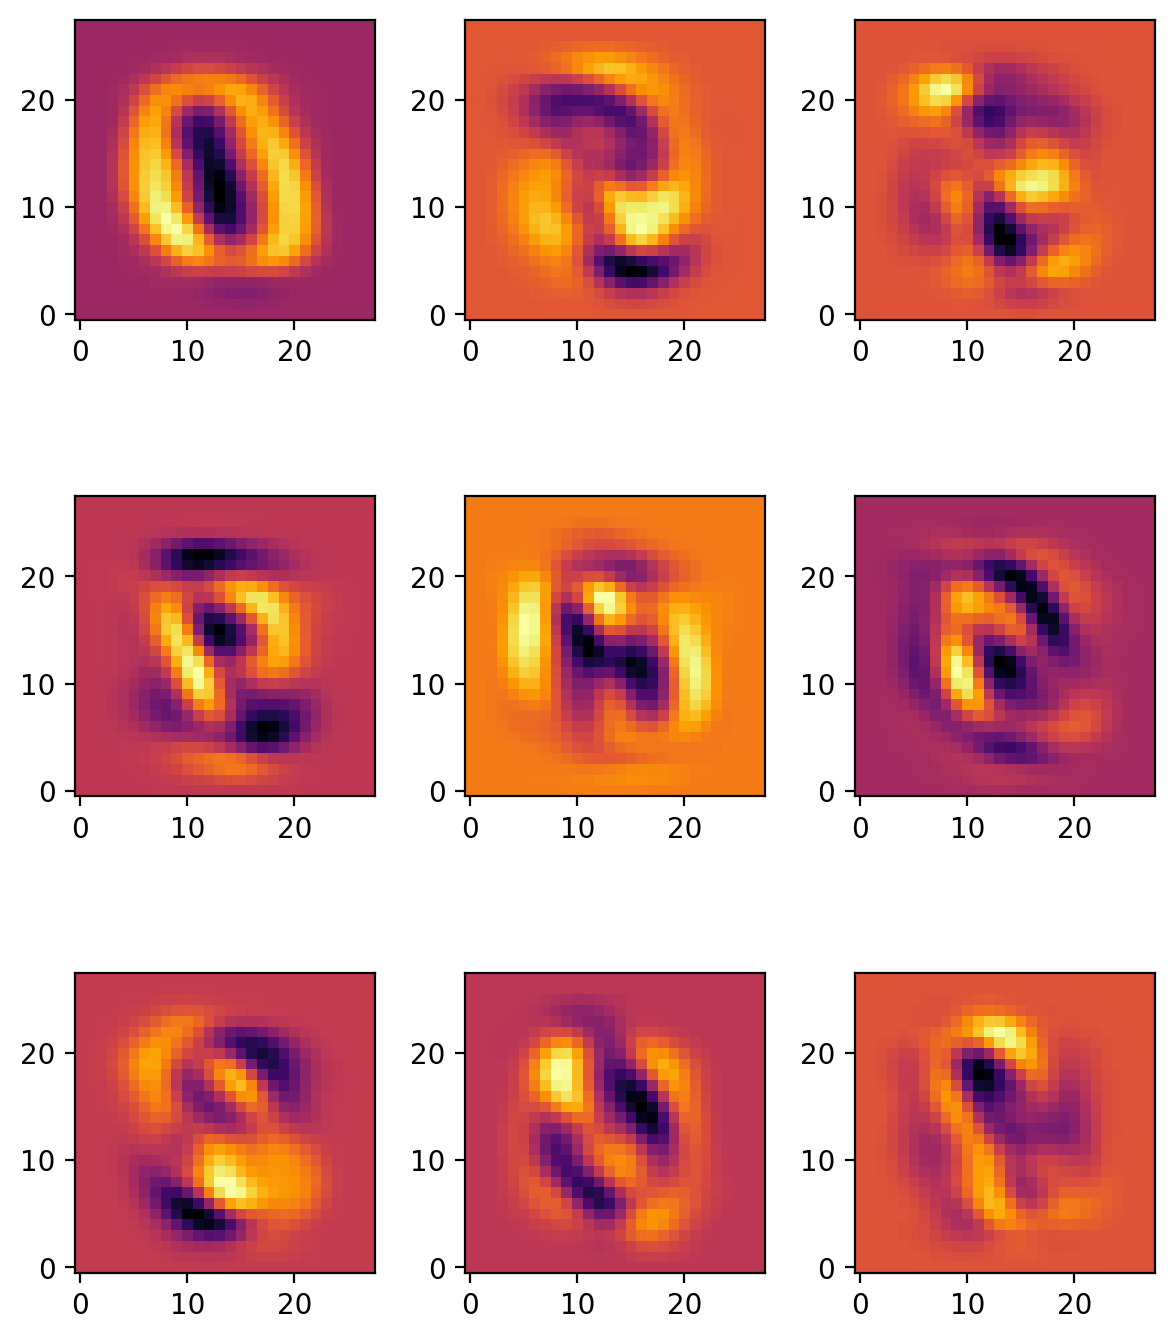

In [ ]:
#taken from PCA notebok by Ryan
print("A few of the PCA components are shown below:")
fig,ax=plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(np.reshape(vecs[:,(i+j*3)],[28,28]), origin='lower',cmap='inferno',interpolation='nearest')
plt.subplots_adjust(left=0,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.7, 
                    wspace=0.3, 
                    hspace=0.2)  #Adjust the space between the subplots to make it organized.

________________________________________________
## Generating a new testing dataset using varying number of the best PCA components and testing the accuracy of each case on the prviously trained network.

Decompose MNIST test data into its PCA components, as we did in the previous part:

In [ ]:
#####################################
#Rescale the test-image mean to zero#
#####################################
X_test=np.reshape(test_images,(10000,784)) #reshape test imgs to 10000 of 784 individual pixels
mu_test=np.mean(X_test,axis=0)  #calculate mean
x_test=X_test-mu_test #to make the mean of x = 0



#####################################################################
#Calculate he covariance matrices and thus generate the eigenvalues.#
#####################################################################
rho_test=np.cov(x_test,rowvar=False) # Make the covaraince matrix by np.cov
vals_test,vecs_test=linalg.eigh(rho_test) #Get the eigenvalues and vectors from the covariance matrix

#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs_test))
print("vals.shape:",np.shape(vals_test))
vecs_test=np.flip(vecs_test) #eigenvectors
vals_test=np.flip(vals_test) #eigenvalues 

vecs.shape: (784, 784)
vals.shape: (784,)


Next, we see how much each principle component contributes to the total variance of the image (ie quality of image):

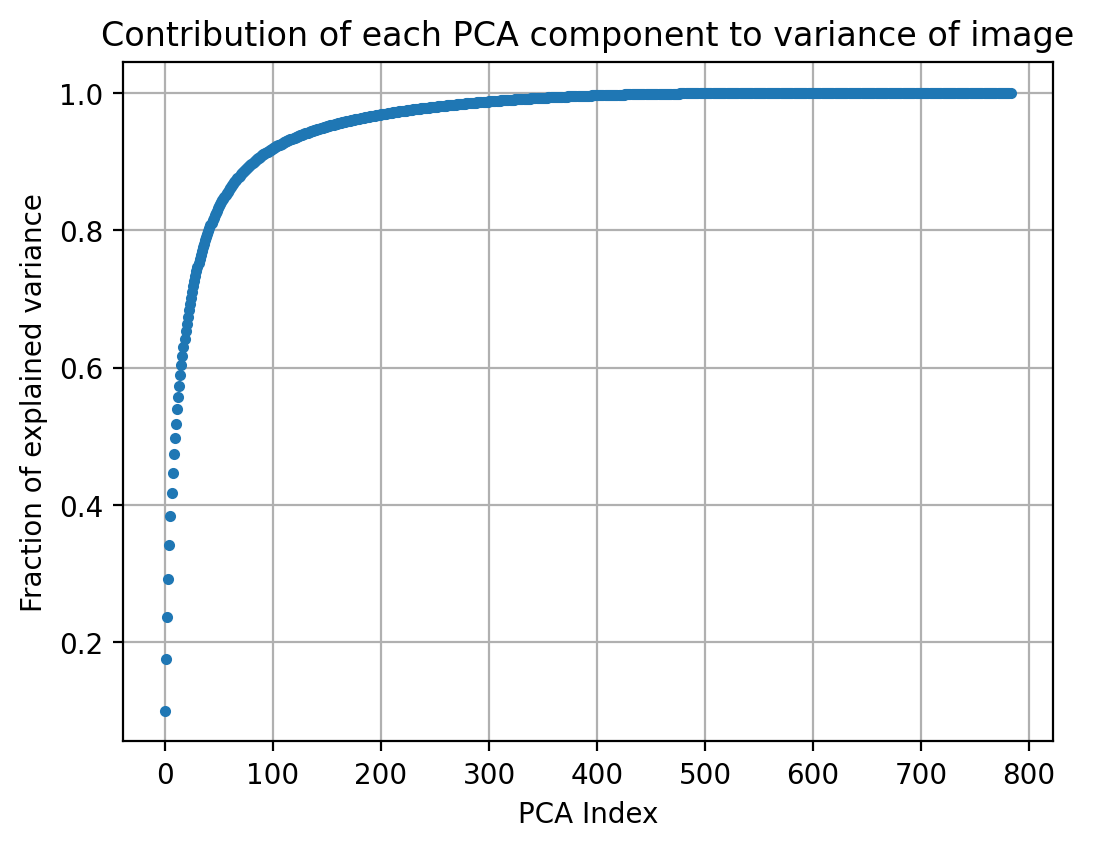

In [ ]:
#Code from Ryan's notebook...again...
fig,ax=plt.subplots()
cs_test=np.cumsum(vals_test.real)                              #Cumulative sum of eigenvalues
cdf_test=cs_test/cs_test[-1]                                   #In terms of final eigenvalue.
index_test=np.arange((np.shape(vals_test)[0]))                 #Generate a range of values for the index.

ax.plot(index_test,cdf_test,"o", markersize=3)
ax.set_xlabel("PCA Index")
ax.set_ylabel("Fraction of explained variance")
ax.set_title("Contribution of each PCA component to variance of image")
ax.grid()

In [ ]:
cdf_test[148]

0.950323130890567

**From looking at the cdf values against their index, we can see that 0-148 PCA index contributes to ~95% of the variance.**

**Thus, I will be using the first 148 components for the ensuing task as a reasonably optimized parameter in terms of test accuracy**.

In [ ]:
#using 148:
P_test=np.dot(x_test,vecs_test) #dot product of test image pixel values and eigenvectors
newImage_test=(np.dot(P_test[:,0:148],vecs_test.T[0:148,:]))+mu #new testing data set

#reshape to original:
test_n = np.reshape(newImage_test, (10000, 28, 28))

In [ ]:
#we can see how this new test dataset is the same shape as the original MNIST test data
print("New test images shape:", np.shape(test_n))
print("Original MNIST test images shape:",np.shape(test_images))

New test images shape: (10000, 28, 28)
Original MNIST test images shape: (10000, 28, 28)


Make plot of N vs Test Accuracy for the each of the N-best PCA components used:

In [ ]:
###Initializing some values for the for-loop
index=148 #max index we will use
test_acc_n = [] #initialise empty array of test accuracies


###For-loop
for i in range(index+1): #generate new test data and run nn with all index up to 150
    
    newImage_test=(np.dot(P_test[:,0:i],vecs_test.T[0:i,:]))+mu #new test images
    
    test_n = np.reshape(newImage_test, (10000, 28, 28)) #reshape
    
    test_loss, test_acc = model.evaluate(test_n,  test_labels, verbose=2) #run nn
    
    test_acc_n.append(test_acc)
    
    clear_output(wait=True)

313/313 - 1s - loss: 0.0849 - accuracy: 0.9745 - 540ms/epoch - 2ms/step


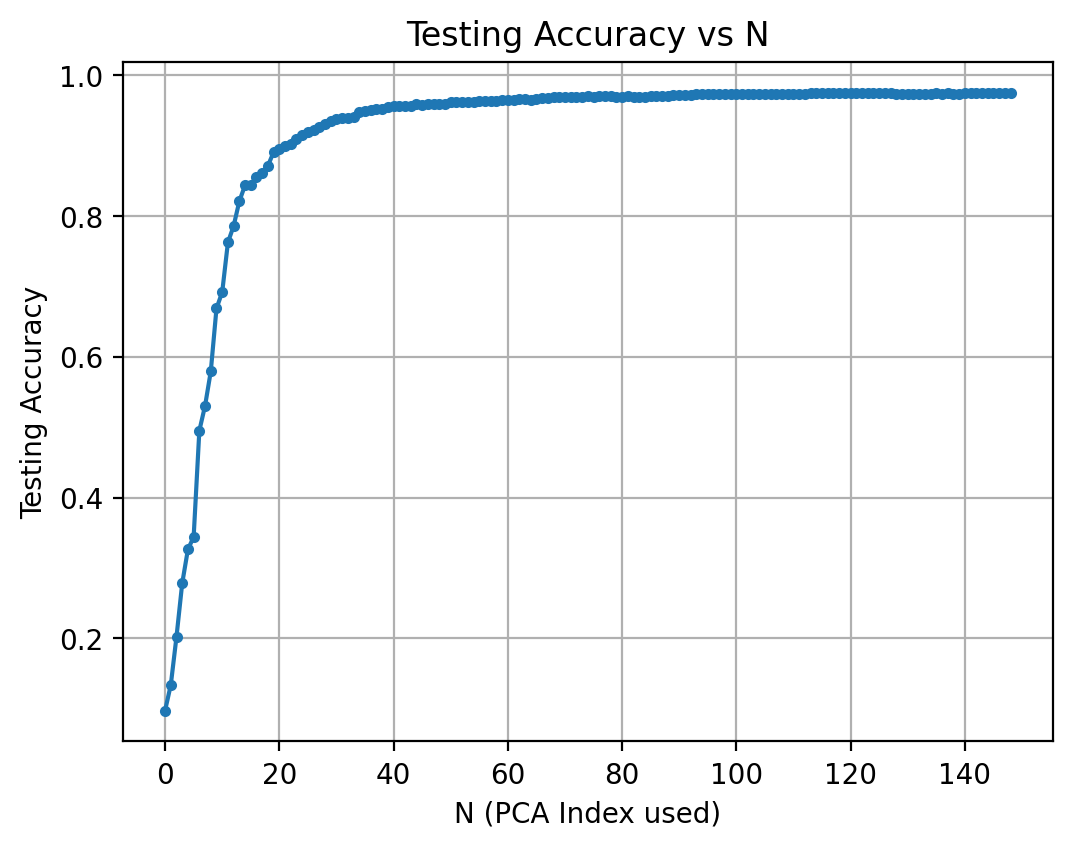

In [ ]:
fig,ax=plt.subplots()
ax.plot(range(index+1),test_acc_n,"-o", markersize=3)
ax.set_ylabel("Testing Accuracy")
ax.set_xlabel("N (PCA Index used)")
ax.set_title("Testing Accuracy vs N")
ax.grid()

In [ ]:
test_acc_n[38]

0.9519000053405762

**Initially, increasing N leads to a big increae in testing accuracy, but after about N=17, there are diminishing returns. Thus, to maintain a balance between testing accuracy and effeciant code, we can use N=39 as it nets about 95% variance while still retaining effeciancy. After this value, graph is close to straight.**
____________________________________________________________________________

## Using the 100 best-PC components to generate a new training data set, and training a new model with it.

First, generate the dot-products and, thus, the new training dataset.

In [ ]:
P_nt=np.dot(x,vecs) #dot product of test image pixel values and eigenvectors
newImages=(np.dot(P_nt[:,0:100],vecs.T[0:100,:]))+mu #new training data set (N=100)

Now, reshape the new training dataset to 28x28, which was the original's shape.

In [ ]:
#reshape to original:
newtrain = np.reshape(newImages, (60000, 28, 28))
                      
#we can see how this new test dataset is the same shape as the original MNIST training data
print("New training images shape:", np.shape(newtrain))
print("Original MNIST training images shape:",np.shape(newtrain))

New training images shape: (60000, 28, 28)
Original MNIST training images shape: (60000, 28, 28)


## Using the new training dataset to train a new model with it.

In [ ]:
#Generate the sequential model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer of 28x28 nuerons
    keras.layers.Dense(70,activation='relu'), #hidden layer of 128 nuerons
    keras.layers.Dense(12) #output layer of 10 nuerons
])

#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

#Train the model with our new training dataset
history=model.fit(train100, train_labels, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4036 - accuracy: 0.8885
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1990 - accuracy: 0.9432
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1523 - accuracy: 0.9555
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1239 - accuracy: 0.9642
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1045 - accuracy: 0.9693
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0910 - accuracy: 0.9737
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0807 - accuracy: 0.9761
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0732 - accuracy: 0.9785
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0654 - accuracy: 0.9809
Epoch 10/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0601 - accuracy: 0.9822

Test Neural Network on testing data and check accuracy:

In [ ]:
print(np.shape(test_images))                                                               
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)                

#print('\nTest accuracy:', test_acc)

(10000, 28, 28)
313/313 - 1s - loss: 0.0836 - accuracy: 0.9756 - 634ms/epoch - 2ms/step


Run the newly trained neural network with the test images from before:

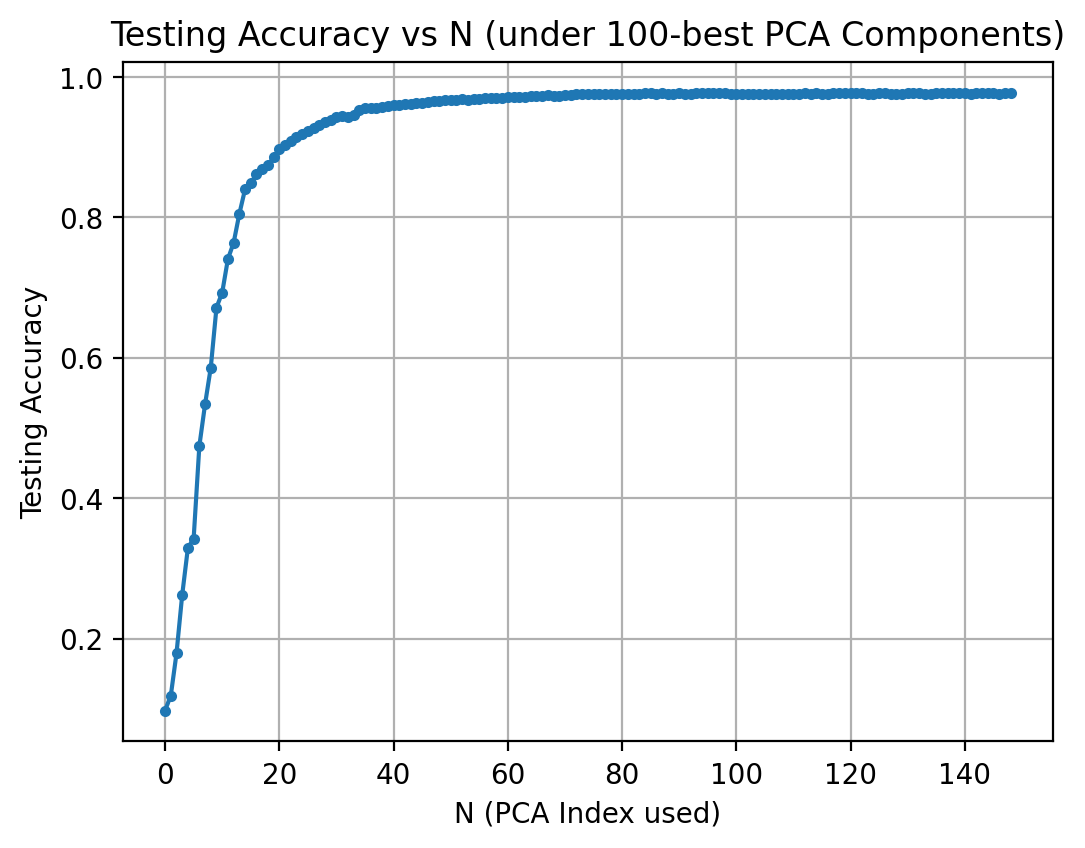

In [ ]:
test_acc_n = []
for i in range(index+1):
    
    newImage_test=(np.dot(P_test[:,0:i],vecs_test.T[0:i,:]))+mu
    
    test_n = np.reshape(newImage_test, (10000, 28, 28)) #reshape
    
    test_loss, test_acc = model.evaluate(test_n,  test_labels, verbose=2)
    
    test_acc_n.append(test_acc)
    
    clear_output(wait=True)

fig,ax=plt.subplots()
ax.plot(range(index+1),test_acc_n,"-o", markersize=3)
ax.set_ylabel("Testing Accuracy")
ax.set_xlabel("N (PCA Index used)")
ax.set_title("Testing Accuracy vs N (under 100-best PCA Components)")
ax.grid()

## Using a network trained with the best 20 components.

Same as previous, but replace 100-comps wih 20-comps.

In [ ]:
newImages=(np.dot(P_nt[:,0:20],vecs.T[0:20,:]))+mu 
newtrain2 = np.reshape(newImages, (60000, 28, 28))
print("New training images shape:", np.shape(newtrain2))
print("Original MNIST training images shape:",np.shape(train_images))

New training images shape: (60000, 28, 28)
Original MNIST training images shape: (60000, 28, 28)


Generate and train the model baed on he 20-comps.

In [ ]:
#Generate the sequential model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer of 28x28 nuerons
    keras.layers.Dense(70,activation='relu'), #hidden layer of 128 nuerons
    keras.layers.Dense(12) #output layer of 10 nuerons
])

#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

#Train the model with our new training dataset
history=model.fit(newtrain2, train_labels, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.5023 - accuracy: 0.8537
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2786 - accuracy: 0.9175
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2140 - accuracy: 0.9363
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1832 - accuracy: 0.9444
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1641 - accuracy: 0.9501
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1517 - accuracy: 0.9542
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1413 - accuracy: 0.9566
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1343 - accuracy: 0.9580
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1289 - accuracy: 0.9610
Epoch 10/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1239 - accuracy: 0.9624

Run the newly trained nueral network with the test images from before:

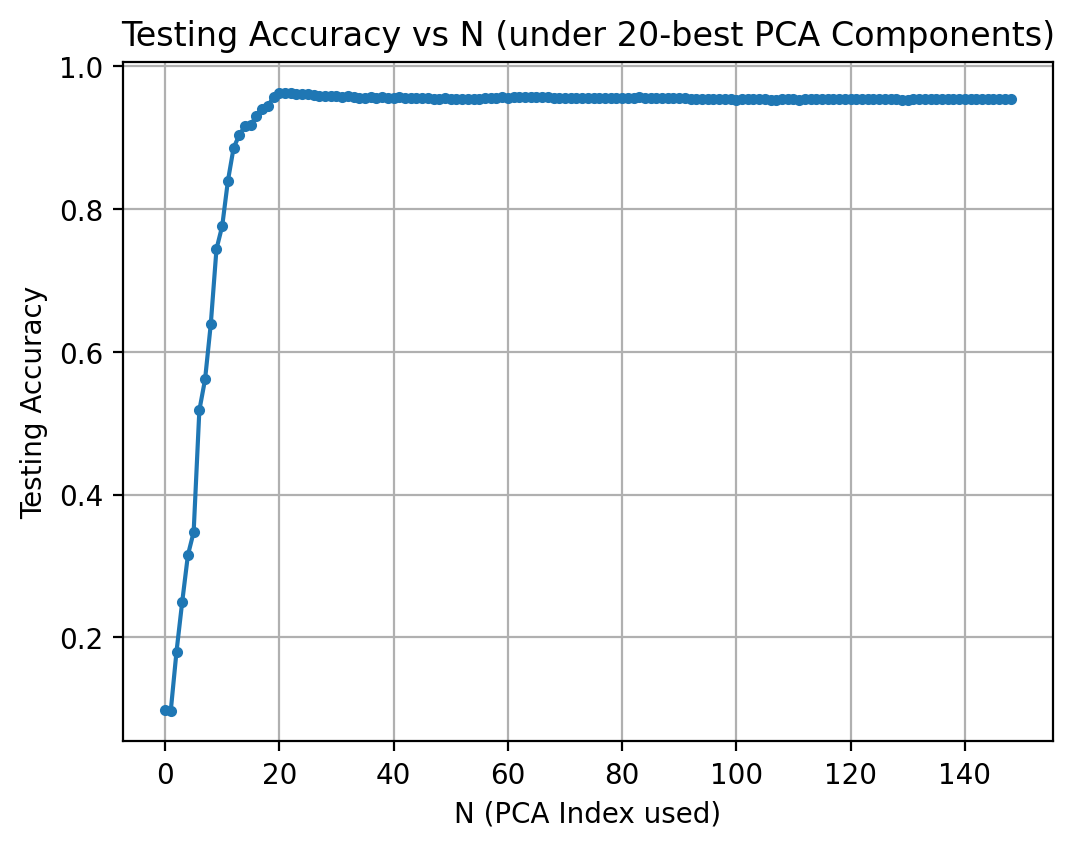

In [ ]:
test_acc_n = []
for i in range(index+1):
    
    newImage_test=(np.dot(P_test[:,0:i],vecs_test.T[0:i,:]))+mu
    
    test_n = np.reshape(newImage_test, (10000, 28, 28)) #reshape
    
    test_loss, test_acc = model.evaluate(test_n,  test_labels, verbose=2)
    
    test_acc_n.append(test_acc)
    
    clear_output(wait=True)

fig,ax=plt.subplots()
ax.plot(range(index+1),test_acc_n,"-o", markersize=3)
ax.set_ylabel("Testing Accuracy")
ax.set_xlabel("N (PCA Index used)")
ax.set_title("Testing Accuracy vs N (under 20-best PCA Components)")
ax.grid()

____
### Using the 100-best
Using 100-best PCA components gives virtually the same result as using the unmodified MNIST training data. This shows that our PCA training data mimics the MNIST training data very well. Therefore, Principle Component Analysis (PCA) is a very accurate technique in machine learning.
_________
### Using the 20-best
Using 20-best PCA components gives the worst result because it decreases in accuracy around the 20 PCA component (for the TEST data, not training data). So, using less PCA components means that accuracy will decrease. Therefore using more PCA compenents for the training dataset will increase testing accuracy. 
___
### Cons of high N-values
However, as seen in in the notebook, there are diminishing returns, and thus using extremely high values is not very helpful. Anythih around or below N=150 should be fine.